In [ ]:
from csv import reader
import numpy as np
from unidecode import unidecode
import pandas as pd
import statsmodels.api as sm
import scipy as ss
from sklearn import preprocessing

In [2]:
from limpeza import main as limpa
from cria_legislatura import main as legislatura
#from build import main as build # rede 1 - Direcionada, ligação votos de Dep em Dep
from build_gml import main as build # rede 2 - Não direcionada, ligação correlação entre todos os votos de dois Deps
from gml_para_rede import main as rede
from conta_frentes import main as frentes
from request_data import main as requests

# roda só uma vez
requests()
limpa()
legislatura()

# roda se mudar o tipo de rede
build()
rede()
frentes()

Baixando arquivos
Requests finalizadas
---------------------
limpa_deputados
limpa_todas_votacoes
limpa_todas_votacoesVotos
limpa_todas_proposicoesAutores
limpa_frentes
Limpeza completa
---------------------
Legislatura
---------------------
Build finalizado
---------------------
Reciprocity 2003-2006: 0.0
Reciprocity 2007-2010: 0.0
Reciprocity 2011-2014: 0.0
Reciprocity 2015-2018: 0.0
Gml para rede
---------------------
Frentes
---------------------


In [4]:
qtd_leg = 4
arquivos = {
    'deputados': [
        'deputados-2003-2006.csv',
        'deputados-2007-2010.csv',
        'deputados-2011-2014.csv',
        'deputados-2015-2018.csv'
    ]
}

path = 'ArquivosLimpos/'

In [94]:
for e in range(qtd_leg):
    deputados = pd.read_csv(path + arquivos['deputados'][e]).dropna()
    H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
    M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
    res = ss.stats.ttest_ind(M,H, equal_var=True)
    print(res)

Ttest_indResult(statistic=1.295826408268886, pvalue=0.19556629049357963)
Ttest_indResult(statistic=1.531498709934274, pvalue=0.12623287005608982)
Ttest_indResult(statistic=1.1160442733279314, pvalue=0.26487344541655394)
Ttest_indResult(statistic=-1.4966099625046663, pvalue=0.13509914129811593)


### 2003 - 2006

In [115]:
deputados = pd.read_csv(path + arquivos['deputados'][0]).dropna()

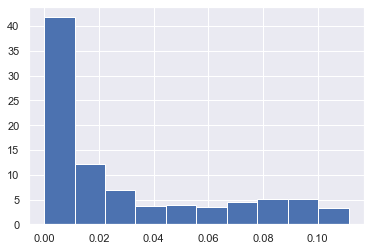

In [134]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

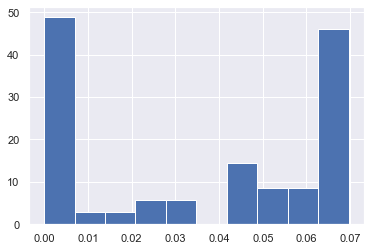

In [117]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

In [118]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=1.295826408268886, pvalue=0.19556629049357963)

### 2007 - 2010

In [119]:
deputados = pd.read_csv(path + arquivos['deputados'][1]).dropna()

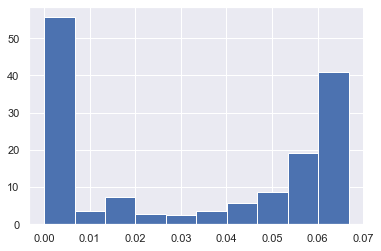

In [120]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

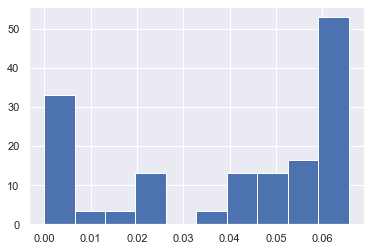

In [121]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

In [122]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=1.531498709934274, pvalue=0.12623287005608982)

### 2011 - 2014

In [123]:
deputados = pd.read_csv(path + arquivos['deputados'][2]).dropna()

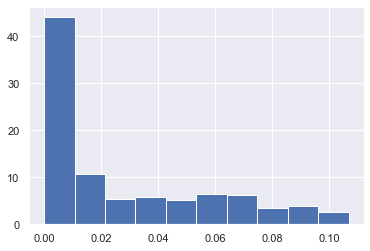

In [124]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

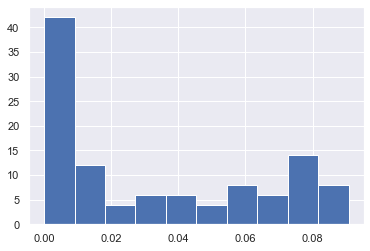

In [125]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

In [126]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=1.1160442733279314, pvalue=0.26487344541655394)

### 2015 - 2018

In [127]:
deputados = pd.read_csv(path + arquivos['deputados'][3]).dropna()

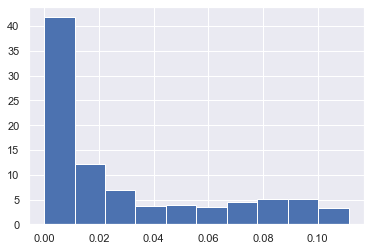

In [128]:
graf_M = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'M'].hist(density=1)

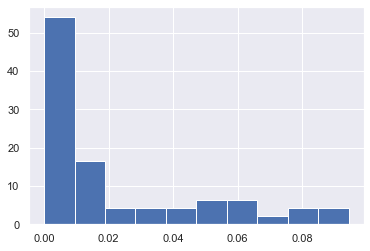

In [129]:
graf_F = deputados['eigenvecto_centrality'][deputados['siglaSexo'] == 'F'].hist(density=1)

In [130]:
H = deputados.query('siglaSexo == "M"')['eigenvecto_centrality']
M = deputados.query('siglaSexo == "F"')['eigenvecto_centrality']
res = ss.stats.ttest_ind(M,H, equal_var=True)
res

Ttest_indResult(statistic=-1.4966099625046663, pvalue=0.13509914129811593)